# Carregando e Pré-processando os Dados com a Tensorflow

In [49]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [25]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
x = range(10)

In [3]:
x

range(0, 10)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices(x)

In [6]:
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [7]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [8]:
dataset = dataset.repeat(3).batch(7)

In [9]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [10]:
dataset = dataset.map(lambda x: x*2)

In [12]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [73]:
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
data = make_moons(1000, noise=0.1)

In [43]:
x, y = data

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
x.shape, y.shape

((1000, 2), (1000,))

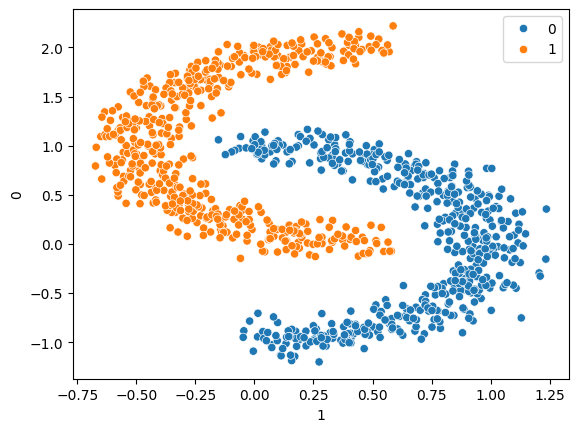

In [46]:
sns.scatterplot(data=pd.DataFrame(x), x=1, y=0, hue=y);

In [61]:
model = Sequential()
model.add(Dense(2, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(100, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

In [62]:
model.compile(loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"], optimizer="adam")

In [65]:
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
25/25 [==============================] - 0s 13ms/step - loss: 0.1508 - accuracy: 0.9538 - val_loss: 0.1791 - val_accuracy: 0.9350
Epoch 2/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1364 - accuracy: 0.9550 - val_loss: 0.1766 - val_accuracy: 0.9350
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1496 - accuracy: 0.9525 - val_loss: 0.1769 - val_accuracy: 0.9350
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1398 - accuracy: 0.9538 - val_loss: 0.2004 - val_accuracy: 0.9400
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.9550 - val_loss: 0.1764 - val_accuracy: 0.9450
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1338 - accuracy: 0.9575 - val_loss: 0.1689 - val_accuracy: 0.9450
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1372 - accuracy: 0.9563 - val_loss: 0.2056 - val_accuracy: 0.9350
Epoch

<Axes: >

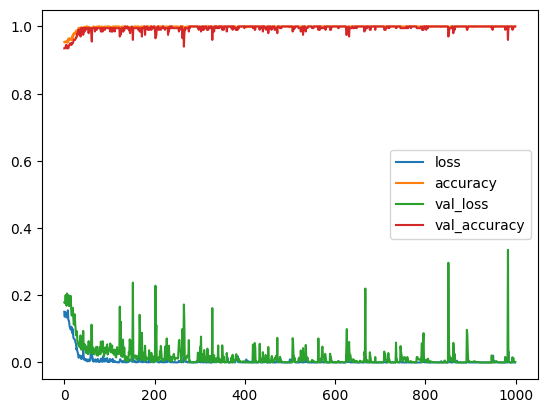

In [67]:
pd.DataFrame(history.history).plot()

In [68]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000


[0.001561543089337647, 1.0]

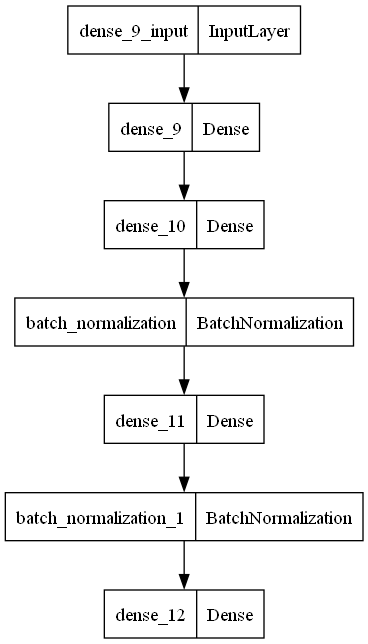

In [69]:
tf.keras.utils.plot_model(model)

In [71]:
previsoes = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [74]:
classes_preditas = np.argmax(previsoes, axis=1)

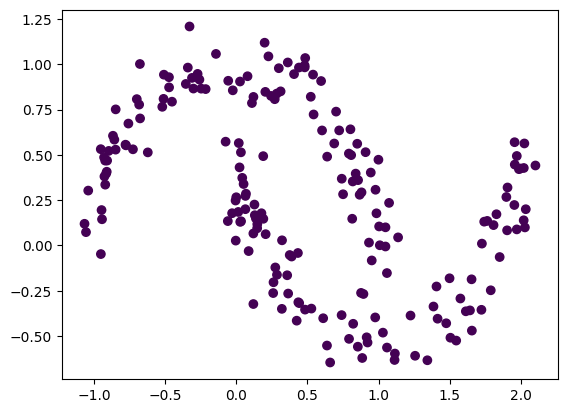

In [77]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=classes_preditas, cmap='viridis')

In [80]:
def plot_decision_boundary(model, X, y):
    h = .02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Faça previsões na grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 12))
    # Plote o scatter plot
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=100)

    # Plote as fronteiras de decisão
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='red')

    plt.title('Fronteiras de Decisão do Modelo')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

1563/1563 [==============================] - 2s 1ms/step


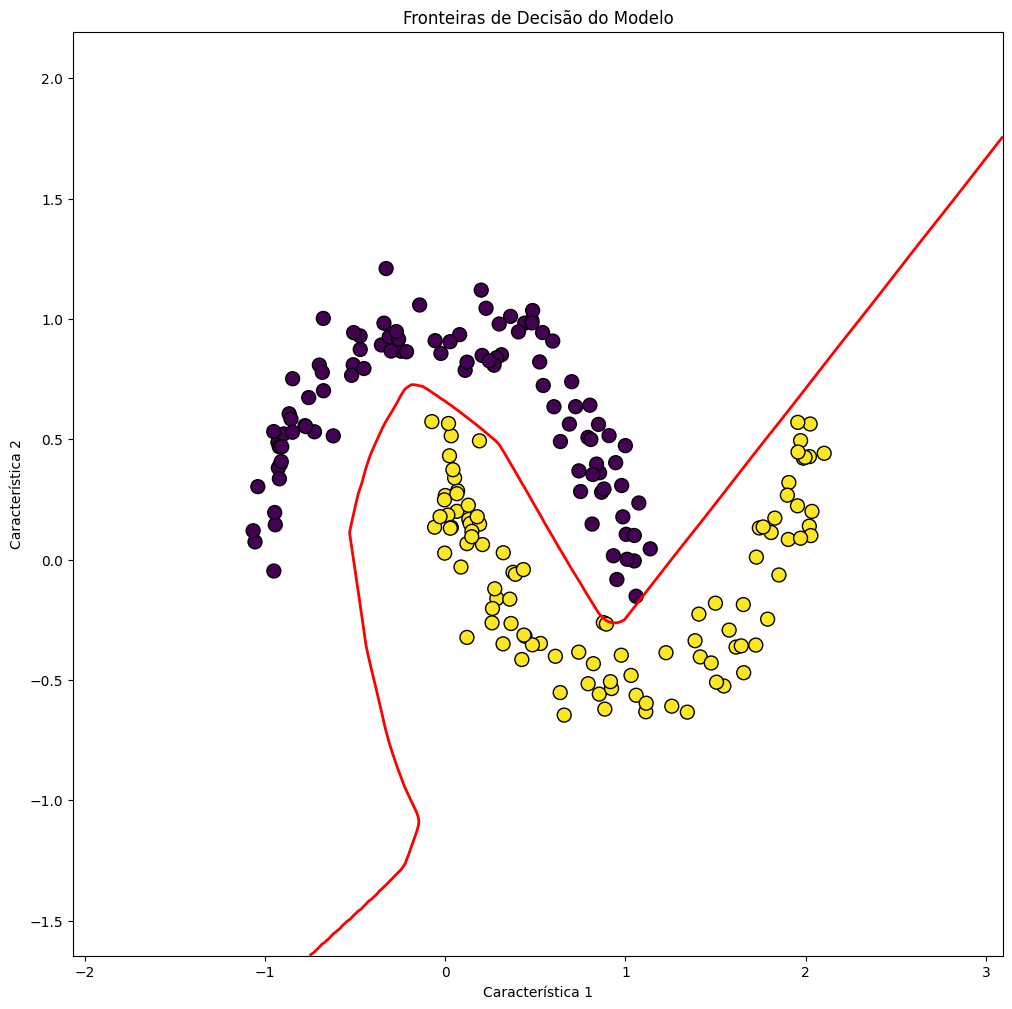

In [81]:
plot_decision_boundary(model, x_test, y_test)

In [84]:
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

In [90]:
input = Input(2)
hidden1 = Dense(100, activation="relu")(input)
hidden2 = Dense(100, activation="relu")(hidden1)
output = Dense(1, activation="sigmoid", name="output")(hidden2)
aux_output = Dense(1, activation="sigmoid", name="aux_output")(hidden1)
model = Model(inputs=[input], outputs=[output, aux_output])

In [91]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 100)                  300       ['input_2[0][0]']             
                                                                                                  
 dense_18 (Dense)            (None, 100)                  10100     ['dense_17[0][0]']            
                                                                                                  
 output (Dense)              (None, 1)                    101       ['dense_18[0][0]']            
                                                                                            

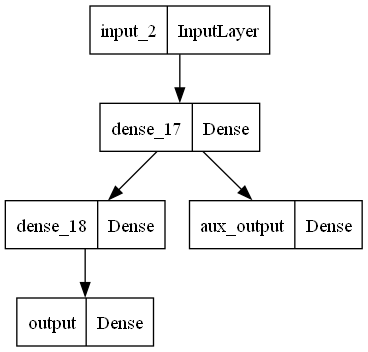

In [92]:
tf.keras.utils.plot_model(model)

In [93]:
model.compile(loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"], optimizer="adam")

In [96]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
25/25 [==============================] - 0s 10ms/step - loss: 0.2394 - output_loss: 0.0224 - aux_output_loss: 0.2170 - output_accuracy: 0.9975 - aux_output_accuracy: 0.9000 - val_loss: 0.3409 - val_output_loss: 0.0340 - val_aux_output_loss: 0.3069 - val_output_accuracy: 0.9950 - val_aux_output_accuracy: 0.8600
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2322 - output_loss: 0.0188 - aux_output_loss: 0.2134 - output_accuracy: 1.0000 - aux_output_accuracy: 0.9038 - val_loss: 0.3330 - val_output_loss: 0.0296 - val_aux_output_loss: 0.3034 - val_output_accuracy: 0.9950 - val_aux_output_accuracy: 0.8700
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.2269 - output_loss: 0.0165 - aux_output_loss: 0.2104 - output_accuracy: 1.0000 - aux_output_accuracy: 0.9038 - val_loss: 0.3257 - val_output_loss: 0.0265 - val_aux_output_loss: 0.2992 - val_output_accuracy: 0.9950 - val_aux_output_accuracy: 0.8700
Epoch 4/20
25/25 [===============

In [97]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2424 - output_loss: 0.0080 - aux_output_loss: 0.2344 - output_accuracy: 1.0000 - aux_output_accuracy: 0.8950


[0.24238580465316772,
 0.008034775033593178,
 0.2343510389328003,
 1.0,
 0.8949999809265137]

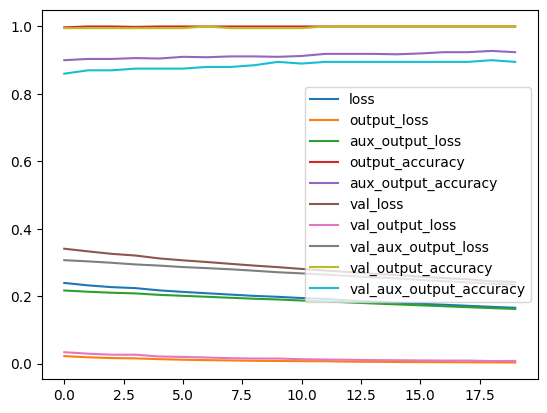

In [98]:
pd.DataFrame(history.history).plot();

In [103]:
import tensorflow_datasets as tfds

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:
dataset = tfds.load(name="mnist")

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 2/4 [00:01<00:02,  1.31s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.78 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.51 url/s]


Dataset mnist downloaded and prepared to C:\Users\franc\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [105]:
mnist_train, mnist_test = dataset["train"], dataset["test"]

In [110]:
mnist_train = mnist_train.shuffle(1000).batch(32).prefetch(1)

In [113]:
for item in mnist_train:
    images = item["image"]
    labels = item["label"]

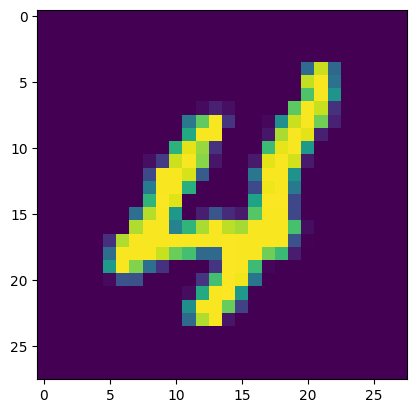

In [117]:
plt.imshow(images[0]);